In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

% matplotlib inline


UsageError: Line magic function `%` not found.


### 1. A simple cost function:

#### $f(x)=x^2+x+1$


In [240]:
x_1 = np.linspace(start=-3, stop=3, num=500)


def f(x):
    return x**2 + x + 1


def df(x):
    return 2 * x + 1


In [241]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        break


print("Local minima: ", new_x)
print("Slope: ", df(new_x))
print("f(x) value at this point is: ", f(new_x))


Local minima:  -0.49996003706460423
Slope:  7.992587079153068e-05
f(x) value at this point is:  0.7500000015970362


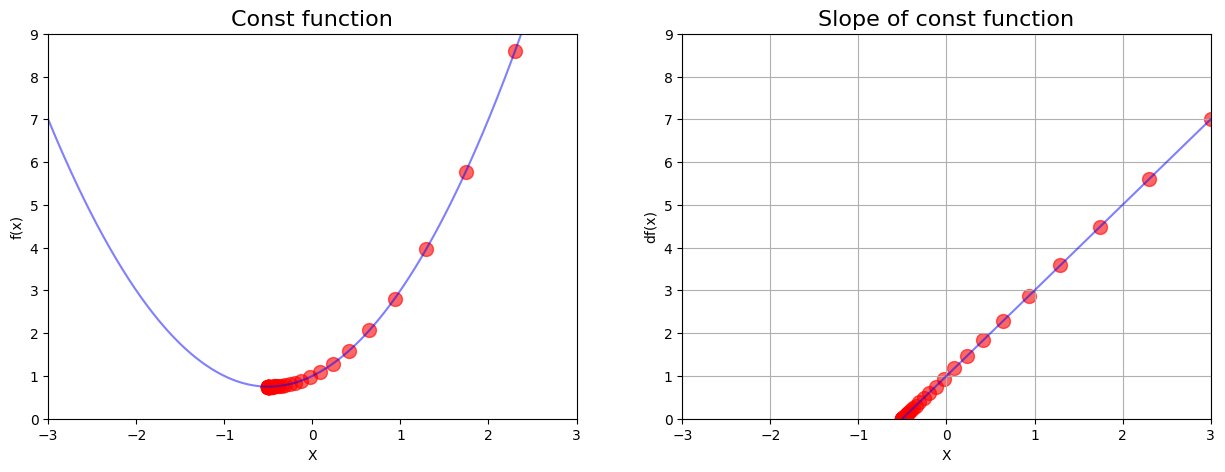

In [242]:
# Graph Plots
plt.figure(figsize=[15, 5])

# chart 1: plot for f(x)
plt.subplot(1, 2, 1)
plt.xlim(-3, 3)
plt.ylim(0, 9)
plt.title("Const function", fontsize=16)
plt.xlabel("X")
plt.ylabel("f(x)")
plt.plot(x_1, f(x_1), color="blue", alpha=0.5)

values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100, alpha=0.6)

# Chart 2: plot for df(x)
plt.subplot(1, 2, 2)
plt.xlim(-3, 3)
plt.ylim(0, 9)
plt.title("Slope of const function", fontsize=16)
plt.xlabel("X")
plt.ylabel("df(x)")
plt.plot(x_1, df(x_1), color="blue", alpha=0.5)
plt.grid()

plt.scatter(x_list, slope_list, color="red", s=100, alpha=0.6)

plt.show()


### 2. Multiple Minima Vs. Initial Guess & Advanced Functions

#### $g(x)=x^4-4x^2+5$


In [243]:
x_2 = np.linspace(start=-2, stop=2, num=1000)


def g(x):
    return x**4 - 4 * x**2 + 5


def dg(x):
    return 4 * x**3 - 8 * x


In [244]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size < precision:
        break


print("Local minima: ", new_x)
print("Slope: ", df(new_x))
print("f(x) value at this point is: ", f(new_x))


Local minima:  -0.49996003706460423
Slope:  7.992587079153068e-05
f(x) value at this point is:  0.7500000015970362


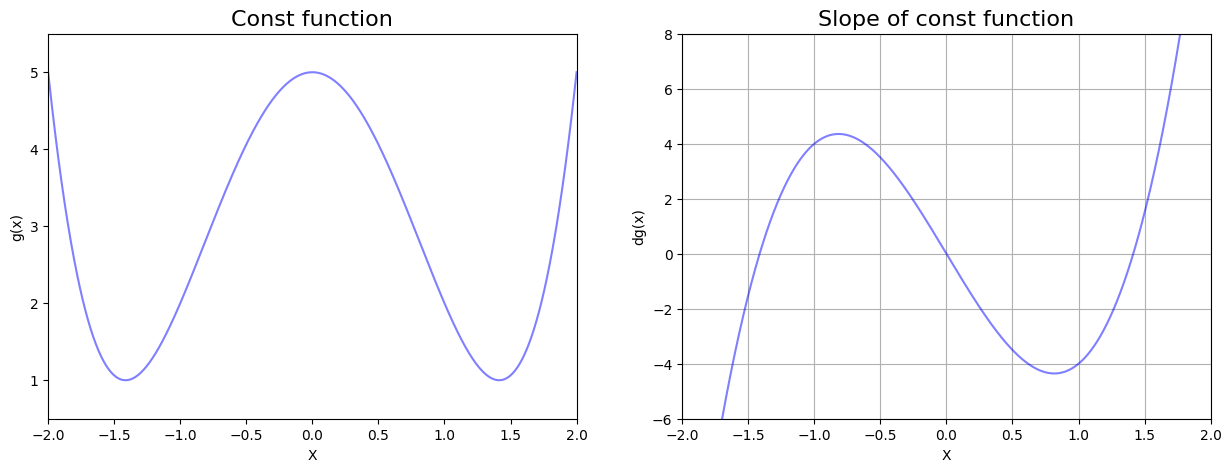

In [245]:
# Graph Plots
plt.figure(figsize=[15, 5])

# chart 1: plot for f(x)
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title("Const function", fontsize=16)
plt.xlabel("X")
plt.ylabel("g(x)")

plt.plot(x_2, g(x_2), color="blue", alpha=0.5)

# Chart 2: plot for df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.title("Slope of const function", fontsize=16)
plt.xlabel("X")
plt.ylabel("dg(x)")
plt.grid()

plt.plot(x_2, dg(x_2), color="blue", alpha=0.5)

plt.show()


### Gradient Descent Function:


In [246]:
# Gradient Descent funtion
def gradient_descent(
    derivative_fun, initial_guess, multiplier=0.02, precision=0.001, max_iteration=300
):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_fun(new_x)]

    for n in range(max_iteration):
        previous_x = new_x
        gradient = derivative_fun(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_fun(new_x))

        if step_size < precision:
            break

    return new_x, x_list, slope_list


In [247]:
# checking the values if anything goes wrong
local_min, list_x, deriv_list = gradient_descent(
    derivative_fun=dg, initial_guess=-0.5, multiplier=0.02, precision=0.001
)
print("Local minima: ", local_min)
print("Number of steps: ", len(list_x))


Local minima:  -1.4122375085019094
Number of steps:  23


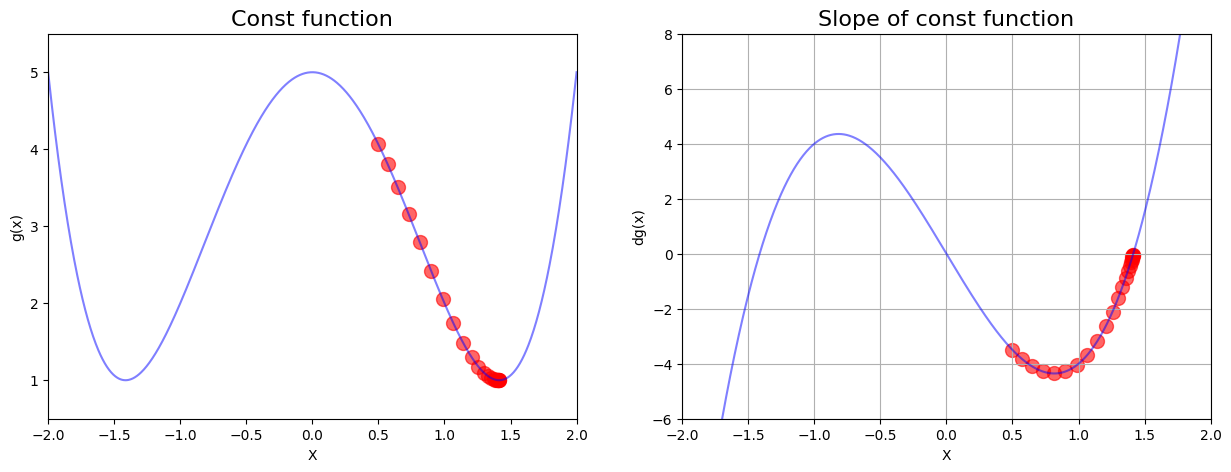

In [248]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(
    derivative_fun=dg, initial_guess=0.5, multiplier=0.02, precision=0.001
)
# Graph Plots
plt.figure(figsize=[15, 5])

# chart 1: plot for f(x)
plt.subplot(1, 2, 1)
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title("Const function", fontsize=16)
plt.xlabel("X")
plt.ylabel("g(x)")

plt.plot(x_2, g(x_2), color="blue", alpha=0.5)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)


# Chart 2: plot for df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.title("Slope of const function", fontsize=16)
plt.xlabel("X")
plt.ylabel("dg(x)")
plt.grid()

plt.plot(x_2, dg(x_2), color="blue", alpha=0.5)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)
plt.show()


#### 3. Divergence, Overflow and Python Tuples

##### $ h(x)=x^5-2X^4+2$


In [249]:
def h(x):
    return x**5 - 2 * x**4 + 2


def dh(x):
    return 5 * x**4 - 8 * x**3


x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)


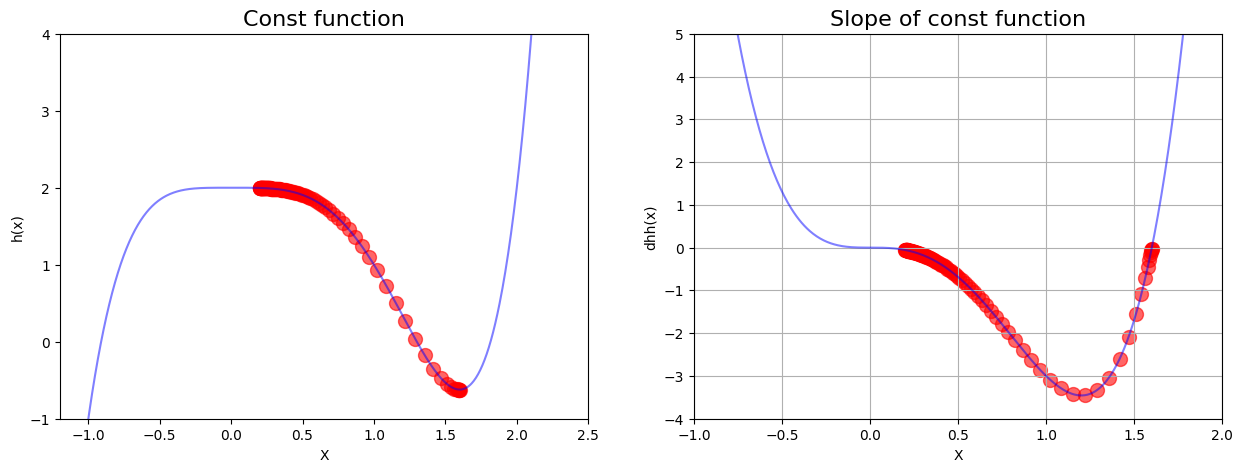

In [250]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_fun=dh, initial_guess=0.2)
# Graph Plots
plt.figure(figsize=[15, 5])

# chart 1: plot for f(x)
plt.subplot(1, 2, 1)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title("Const function", fontsize=16)
plt.xlabel("X")
plt.ylabel("h(x)")

plt.plot(x_3, h(x_3), color="blue", alpha=0.5)
plt.scatter(list_x, h(np.array(list_x)), color="red", s=100, alpha=0.6)


# Chart 2: plot for df(x)
plt.subplot(1, 2, 2)
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.title("Slope of const function", fontsize=16)
plt.xlabel("X")
plt.ylabel("dhh(x)")
plt.grid()

plt.plot(x_3, dh(x_3), color="blue", alpha=0.5)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.6)
plt.show()


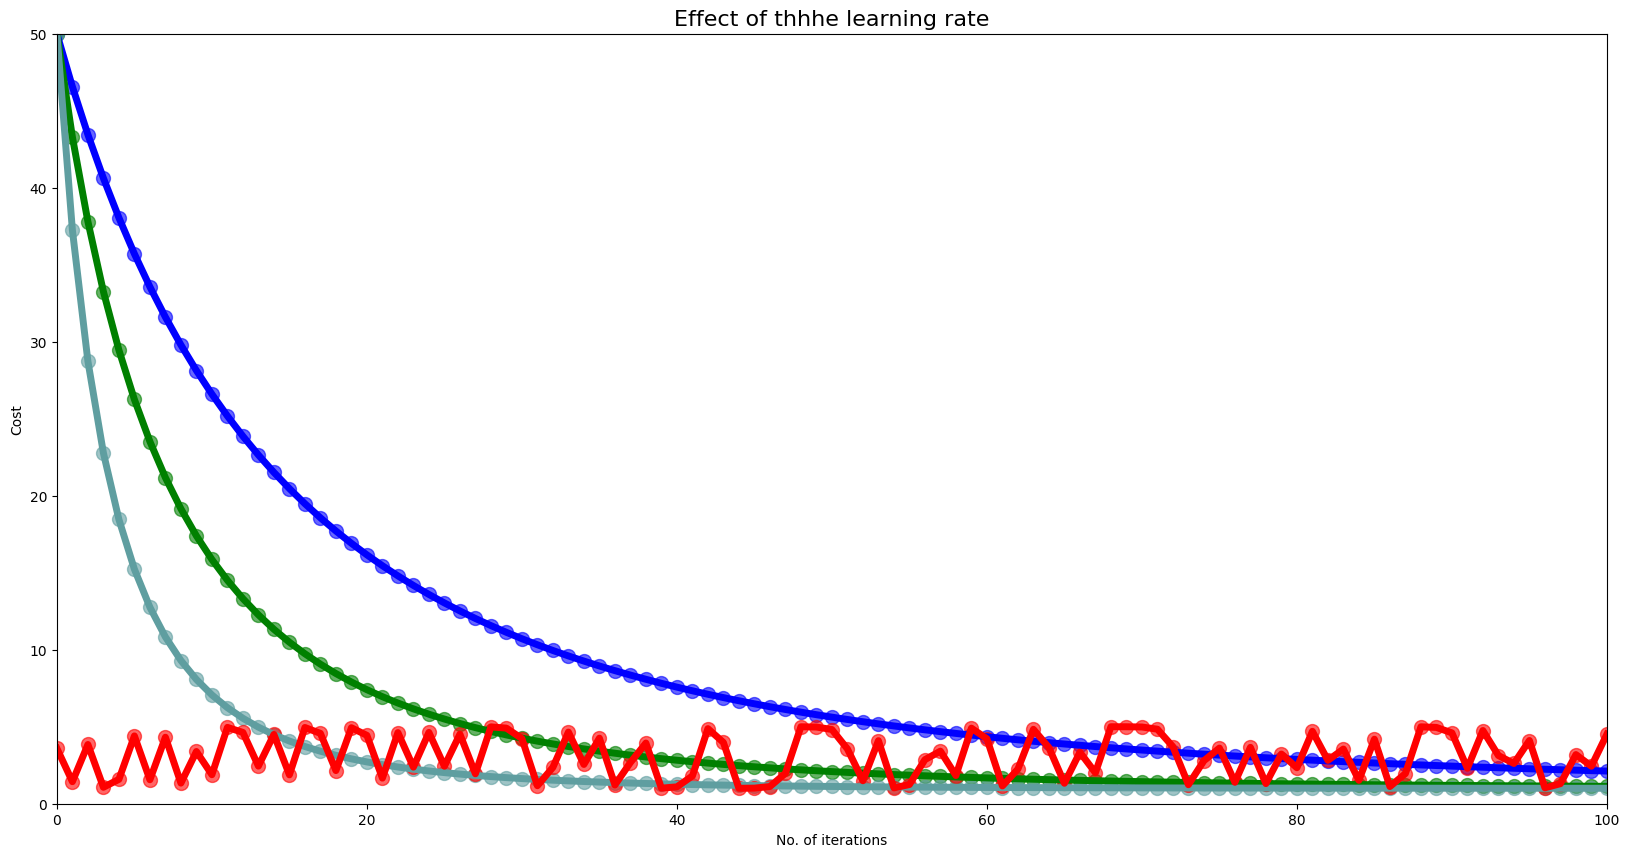

In [251]:
# Run the gradient descent 3 times
n = 100
# Calling gradient descent function

# low learning rate
low_gamma = gradient_descent(
    derivative_fun=dg,
    initial_guess=3,
    multiplier=0.0005,
    precision=0.0001,
    max_iteration=n,
)

# medium learning rate
mid_gamma = gradient_descent(
    derivative_fun=dg,
    initial_guess=3,
    multiplier=0.001,
    precision=0.0001,
    max_iteration=n,
)

# high learning rate
high_gamma = gradient_descent(
    derivative_fun=dg,
    initial_guess=3,
    multiplier=0.002,
    precision=0.0001,
    max_iteration=n,
)

# Extremely high learning rate
extreme_gamma = gradient_descent(
    derivative_fun=dg,
    initial_guess=1.9,
    multiplier=0.25,
    precision=0.0001,
    max_iteration=n,
)

# Graph Plot
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title("Effect of thhhe learning rate", fontsize=16)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")

# Y-axis
low_values = np.array(low_gamma[1])


# X-axis
iteration_list = list(range(0, n + 1))

#
plt.plot(iteration_list, g(low_values), color="blue", linewidth=5)
plt.scatter(iteration_list, g(low_values), color="blue", s=100, alpha=0.6)

plt.plot(iteration_list, g(np.array(mid_gamma[1])), color="green", linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color="green", s=100, alpha=0.6)

plt.plot(iteration_list, g(np.array(high_gamma[1])), color="cadetblue", linewidth=5)
plt.scatter(
    iteration_list, g(np.array(high_gamma[1])), color="cadetblue", s=100, alpha=0.6
)

plt.plot(iteration_list, g(np.array(extreme_gamma[1])), color="red", linewidth=5)
plt.scatter(
    iteration_list, g(np.array(extreme_gamma[1])), color="red", s=100, alpha=0.6
)

plt.show()


### 4. Data vizuiliation and 3D charts

#### $f(x,y)=\frac{1}{3^{-x^2-y^2} +1}$


In [252]:
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4, y_4 = np.meshgrid(x_4, y_4)


def f(x, y):
    r = 3 ** (-(x**2) - y**2)
    return 1 / (1 + r)


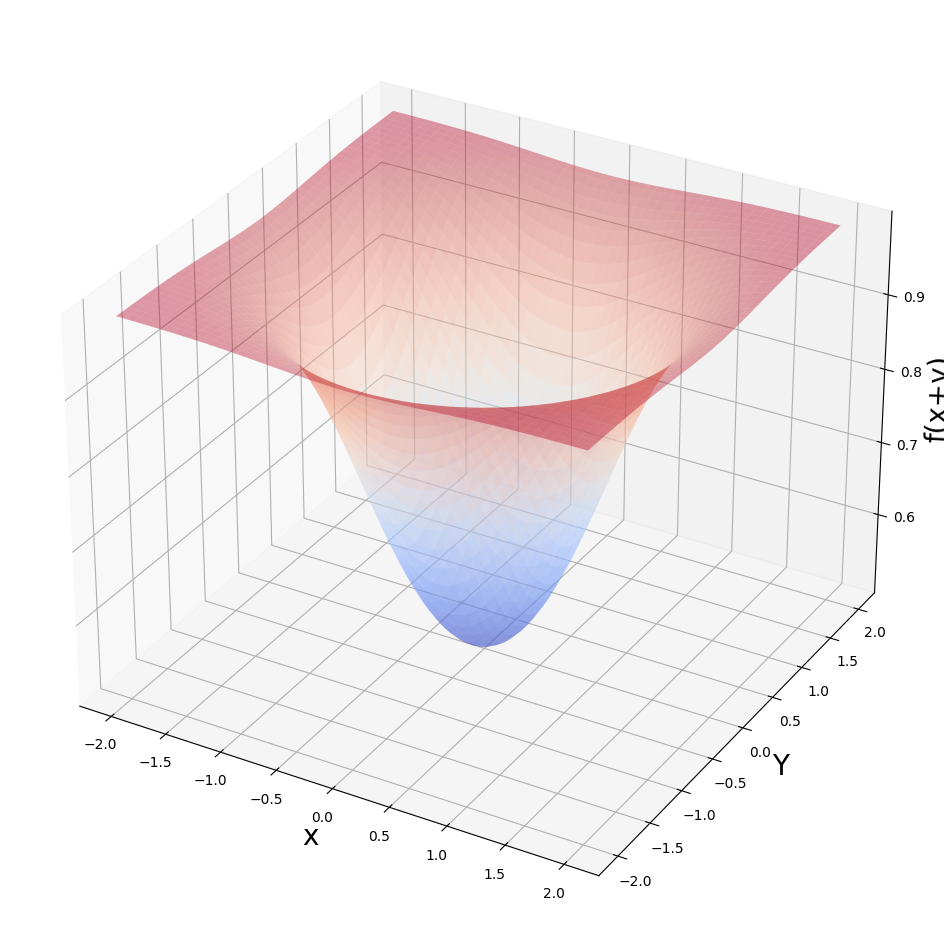

In [253]:
# Generating 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection="3d")

ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x+y)", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
plt.show()


### Partial Derivative Example


In [254]:
a, b = symbols("x,y")
print("Cost fun: ", f(a, b))
print("Partial der. wrt x: ", diff(f(a, b), a))
print("Partial der. wrt y: ", diff(f(a, b), b))

print("Value of f at 1.8, 1.0 is: ", f(a, b).evalf(subs={a: 1.8, b: 1.0}))
print(
    "Value of df wrt a at 1.8, 1.0 is: ", diff(f(a, b), a).evalf(subs={a: 1.8, b: 1.0})
)


Cost fun:  1/(3**(-x**2 - y**2) + 1)
Partial der. wrt x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial der. wrt y:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f at 1.8, 1.0 is:  0.990604794032582
Value of df wrt a at 1.8, 1.0 is:  0.0368089716197505


### Using partial derivatives

##### NOTE: If we define those partial derivatives functions ourselves, code execution will be a lot faster than this.


In [255]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guesses

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

print("Values in gradient array: ", gradients)
print(f"Minimun occurs at x: {params[0]} and y {params[1]}")
print("The cost is: ", f(params[0], params[1]))


Values in gradient array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimun occurs at x: 3.45838599885832E-11 and y 1.92132555492129E-11
The cost is:  0.500000000000000


## NOTE: I found this easy to create multi-dimentional arrays:


In [256]:
ans = np.array([["a", "b", "c", "d", "e", "f"]]).reshape(2, 3)
print(ans.shape)
print(ans)


(2, 3)
[['a' 'b' 'c']
 ['d' 'e' 'f']]


### More about numpy arrays


In [257]:
names_0 = np.array([["Anil", "Thapa", "Sulav", "Bhandari"]]).reshape(2, 2)
print("\nFirst array: \n", names_0)

names_1 = np.array([["Krishna", "Bhandari"]])
print("\n Second array: \n", names_1)

names = np.append(arr=names_0, values=names_1, axis=0)
print("\n Final array: \n", names)

print("\nFirst row: \n", names[0])
print("\nFirst column (names only): \n", names[:, 0])



First array: 
 [['Anil' 'Thapa']
 ['Sulav' 'Bhandari']]

 Second array: 
 [['Krishna' 'Bhandari']]

 Final array: 
 [['Anil' 'Thapa']
 ['Sulav' 'Bhandari']
 ['Krishna' 'Bhandari']]

First row: 
 ['Anil' 'Thapa']

First column (names only): 
 ['Anil' 'Sulav' 'Krishna']


In [258]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guesses
values_array = params.reshape(1, 2)

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a: params[0], b: params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array = np.append(arr=values_array, values=params.reshape(1, 2), axis=0)

print("Values in gradient array: ", gradients)
print(f"Minimun occurs at x: {params[0]} and y {params[1]}")
print("The cost is: ", f(params[0], params[1]))


Values in gradient array:  [2.01013037525579e-11 1.11673909736433e-11]
Minimun occurs at x: 3.45838599885832E-11 and y 1.92132555492129E-11
The cost is:  0.500000000000000


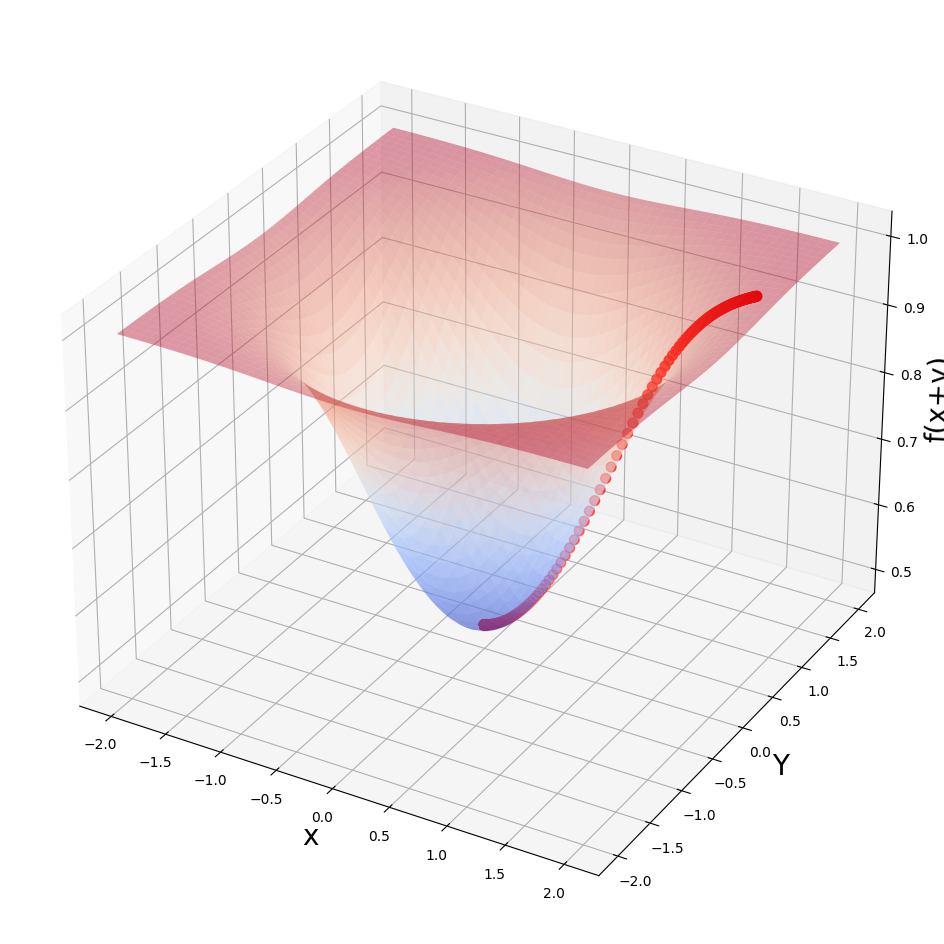

In [259]:
# Generating 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection="3d")

ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("f(x+y)", fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(
    values_array[:, 0],
    values_array[:, 1],
    f(values_array[:, 0], values_array[:, 1]),
    s=50,
    color="red",
)

plt.show()


### Example 5 - Working with Data & a Real Cost Function

### Mean Squared Error: a cost function for regression problems

#### $$RSS =\sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y- \hat{y} \big)^2 $$


In [260]:
# data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).reshape(7, 1)
y_5 = np.array([[1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]]).reshape(7, 1)


In [261]:
regr = LinearRegression()
regr.fit(x_5, y_5)
print("Theta 0: ", regr.intercept_[0])
print("Theta 1: ", regr.coef_[0][0])


Theta 0:  0.8475351486029554
Theta 1:  1.222726463783591


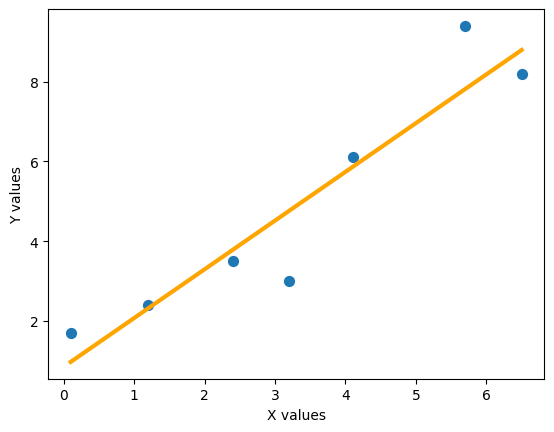

In [262]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color="orange", linewidth=3)

plt.xlabel("X values")
plt.ylabel("Y values")

plt.show()


In [263]:
# y_hat = theta_0 + theta_1*x
y_hat = regr.intercept_[0] + regr.coef_[0][0] * x_5
print("Estimated y hat are:\n", y_hat)
print("Actual values are:\n", y_5)


Estimated y hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual values are:
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [264]:
def mse(y, y_hat):  # value of n is 7 in this case
    return 1 / y.size * sum((y - y_hat) ** 2)
    # return np.average((y-y_hat)**2,axis=0)    


In [265]:
print("Manually calculated MSE: ", mse(y_5, y_hat))
print("Manually calculated MSE #1: ", mean_squared_error(y_5, y_hat))
print("MSE regression is: ", mean_squared_error(y_5, regr.predict(x_5))) # we will use this to predict MSE.


Manually calculated MSE:  [0.94796558]
Manually calculated MSE #1:  0.9479655759794575
MSE regression is:  0.9479655759794575


In [266]:
nr_thetas=200
th_0= np.linspace(start=-1,stop=3,num=nr_thetas)
th_1= np.linspace(start=-1,stop=3,num=nr_thetas)
plot_t0,plot_t1=np.meshgrid(th_0,th_1)

In [267]:
plot_cost=np.zeros((nr_thetas,nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat=plot_t0[i][j]+plot_t1[i][j]*x_5
        plot_cost[i][j]=mse(y_5,y_hat)



<function matplotlib.pyplot.show(close=None, block=None)>

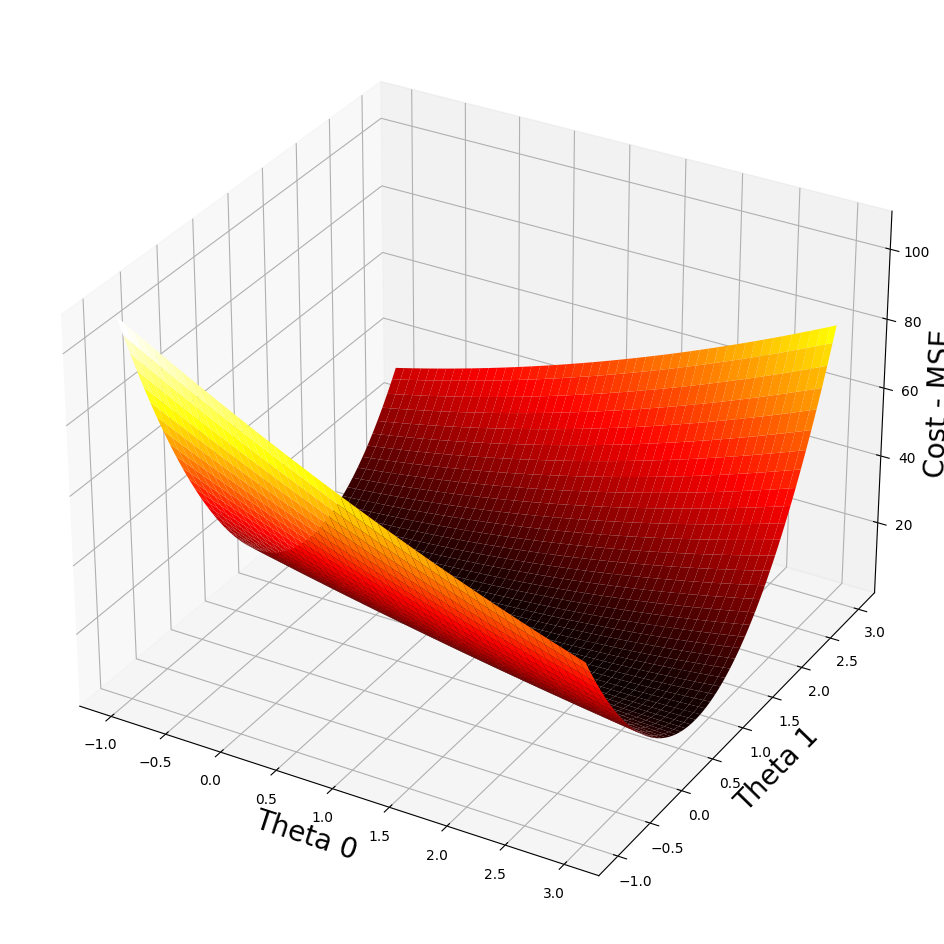

In [271]:
# plotting MSE
fig=plt.figure(figsize=[16,12])
ax=fig.add_subplot(projection='3d')

ax.set_xlabel("Theta 0 ",fontsize= 20)
ax.set_ylabel("Theta 1 ",fontsize= 20)
ax.set_zlabel("Cost - MSE ",fontsize= 20)

ax.plot_surface(plot_t0,plot_t1,plot_cost,cmap=cm.hot)
plt.show

In [274]:
print("Min value of plot_cost(MSE): ",plot_cost.min())
# minimum value of x and y at this point is:
ij_min= np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print("Min occurs at: ",ij_min)
print("Min MSE for Theta 0 at plot_t0[111][91]: ",plot_t0[111][91])
print("Min MSE for theta 1 at plot_t1[111][91]: ",plot_t1[111][91])


Min value of plot_cost(MSE):  0.9483826526747163
Min occurs at:  (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]:  0.829145728643216
Min MSE for theta 1 at plot_t1[111][91]:  1.2311557788944723


### Partial Derivatives of MSE w.r.t. $\theta_o$ and $\theta_1$
#### $$\frac{\partial MSE} {\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} − \theta_0-\theta_1 x^{(i)} \big)$$
#### $$\frac{\partial MSE} {\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} − \theta_0-\theta_1 x^{(i)}) \big( x^{(i)} \big)$$

In [305]:
def grad(x, y, thetas):
    n = y.size

    theta0_slope = (-2 / n) * sum(y - thetas[0]- thetas[1] * x)
    theta1_slope = (-2 / n) * sum((y - thetas[0]- thetas[1] * x) * x)

    # return np.append(arr=theta0_slope, values=theta1_slope,axis=0)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)


In [316]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

#collecting datas for the scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5,thetas[0]+thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    plot_vals=np.append(arr=plot_vals,values=thetas.reshape(1,2),axis=0)
    mse_vals = np.append(arr=mse_vals,values=mse(y_5,thetas[0]+thetas[1]*x_5))

print("Min occurs at: Theta 0: ", thetas[0])
print("Min occurs at: Theta 1: ", thetas[1])
print(" MSE is: ", mse(y_5, thetas[0]+thetas[1]*x_5))


Min occurs at: Theta 0:  0.8532230461743415
Min occurs at: Theta 1:  1.2214935332607393
 MSE is:  [0.94797511]


<function matplotlib.pyplot.show(close=None, block=None)>

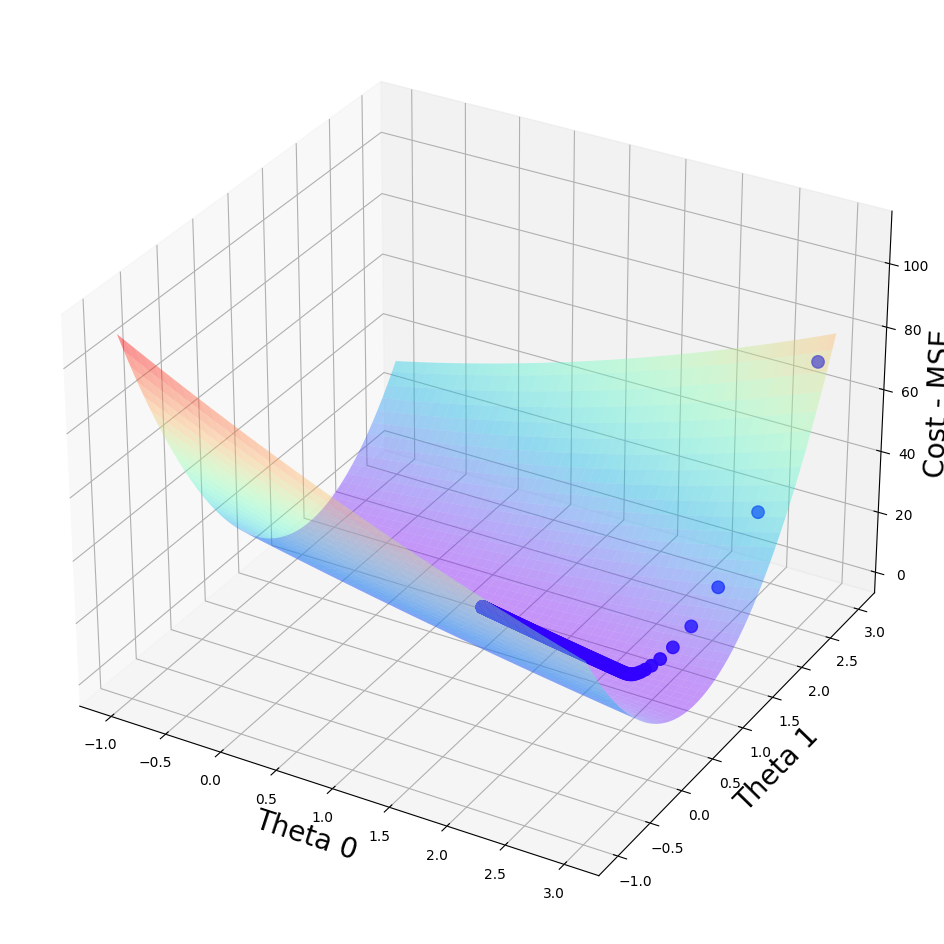

In [322]:
# plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection="3d")

ax.set_xlabel("Theta 0 ", fontsize=20)
ax.set_ylabel("Theta 1 ", fontsize=20)
ax.set_zlabel("Cost - MSE ", fontsize=20)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color="blue")


ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow,alpha=0.4)
plt.show
